# Longevity analysis of mosquitoes exposed to bednets.

### Mosquitoes have been exposed to 02 bednets (Bednet1 and Bednet2) for 05 min. After exposure, we count daily death in each group : Control (mosquitoes non exposed), BDN1 (Mosquitoes exposed to Bednet1), and BDN2 (Mosquitoes exposed to bednet2.). <b>We then want to know if there is a difference in term of survivability in each group</b> (Control, BDN1 and BDN2):


# 1- The Dataset

In [128]:
# Load the data
data = read.csv('E:/DS Work Directory/Mosquitoes_data.csv', sep=';')

### Inspect

In [140]:
# Inspect the data
head(data)
str(data)
library(knitr)
kable(summary(data))
summary(is.na(data))

Replicat,Days,Control,BDN1,BDN2
R,1,4,200,193
R,2,11,28,14
R,3,4,35,18
R,4,7,21,4
R,5,11,21,18
R,6,7,14,7


'data.frame':	30 obs. of  5 variables:
 $ Replicat: Factor w/ 1 level "R": 1 1 1 1 1 1 1 1 1 1 ...
 $ Days    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Control : int  4 11 4 7 11 7 11 21 25 25 ...
 $ BDN1    : int  200 28 35 21 21 14 35 32 42 28 ...
 $ BDN2    : int  193 14 18 4 18 7 4 14 21 7 ...




|   |Replicat |     Days     |   Control     |     BDN1      |     BDN2      |
|:--|:--------|:-------------|:--------------|:--------------|:--------------|
|   |R:30     |Min.   : 1.00 |Min.   : 0.000 |Min.   :  0.00 |Min.   :  0.00 |
|   |NA       |1st Qu.: 8.25 |1st Qu.: 4.000 |1st Qu.:  7.00 |1st Qu.:  7.00 |
|   |NA       |Median :15.50 |Median : 7.000 |Median : 11.00 |Median : 12.50 |
|   |NA       |Mean   :15.50 |Mean   : 8.533 |Mean   : 21.73 |Mean   : 19.23 |
|   |NA       |3rd Qu.:22.75 |3rd Qu.:11.000 |3rd Qu.: 26.25 |3rd Qu.: 18.00 |
|   |NA       |Max.   :30.00 |Max.   :25.000 |Max.   :200.00 |Max.   :193.00 |

  Replicat          Days          Control           BDN1        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:30        FALSE:30        FALSE:30        FALSE:30       
    BDN2        
 Mode :logical  
 FALSE:30       

The Data doesn't contain missing value.
Let's proceed to some bivariate analysis

In [158]:
colSums(data[,3:5])

Control    BDN1    BDN2 
    256     652     577

We have 256 mosquitoes in Control group, 652 in BDN1 group and 577 in BDN2 group

In [3]:
library(Hmisc)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units




### Bivariate analysis

In [4]:
cor = rcorr(as.matrix(data[,2:5]), type=c("pearson"))
cor

         Days Control  BDN1  BDN2
Days     1.00   -0.39 -0.52 -0.36
Control -0.39    1.00  0.11 -0.06
BDN1    -0.52    0.11  1.00  0.93
BDN2    -0.36   -0.06  0.93  1.00

n= 30 


P
        Days   Control BDN1   BDN2  
Days           0.0336  0.0033 0.0513
Control 0.0336         0.5696 0.7647
BDN1    0.0033 0.5696         0.0000
BDN2    0.0513 0.7647  0.0000       

We notice a significant correlation between BDN1 and BDN2 (cor = 0.93)


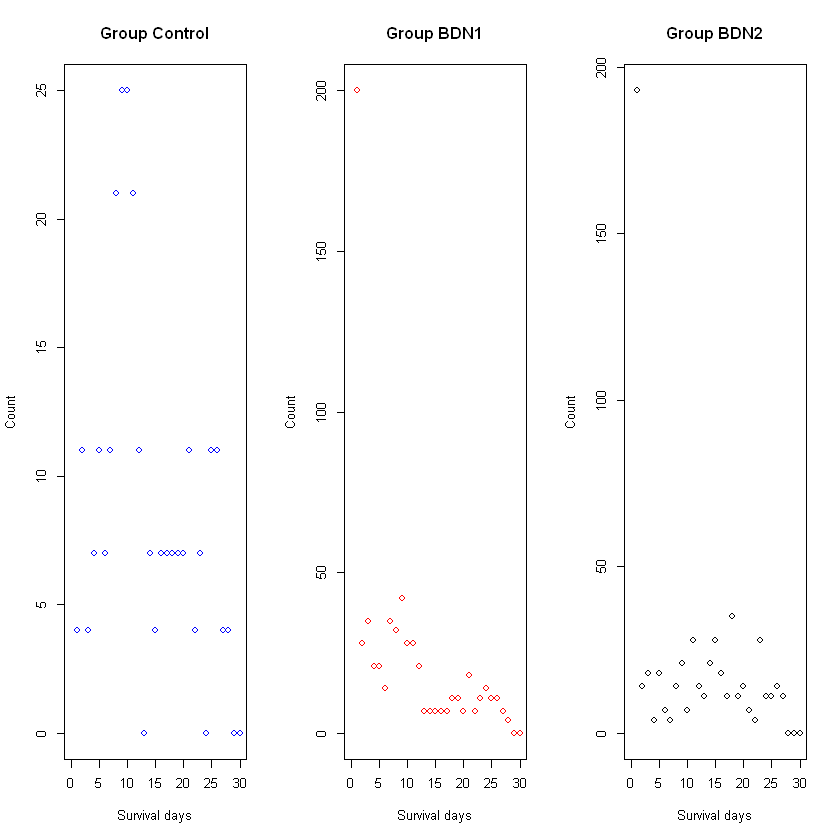

In [59]:
# Scatter plot

#png(file = "Scatter plot Mosquitoes data")
par(mfrow=c(1,3))
plot(data$Days, data$Control, type='p', main = 'Group Control',col="blue", lty = 2:1,
     ylab = "Count", xlab = "Survival days", xlim = c(0, 30))
plot(data$Days, data$BDN1, type='p', main='Group BDN1',col="red", lty = 2:1,
    ylab = "Count", xlab = "Survival days", xlim = c(0, 30))
plot(data$Days, data$BDN2, type='p', main='Group BDN2',col="black", lty = 2:1,
     ylab = "Count", xlab = "Survival days", xlim = c(0, 30))
#dev.off()

BDN1 and BDN2 have a high number of death the first day (around 200), and this number decrease suddently at day 2.
Control seems to have a constant number of death, with some few values > 20

### Data transformation, for survival analysis needs

In [81]:
# We remove the unusual variable (Replicat)
n.data = data[,2:5]

# number of days of the experiment
ntime=length(n.data$Days) 

# We create the new data frame with new variables : 'Status' to get the status of mosquitoes at day t (1 for decease),
# 'group' to identify to wich group the mosquitoe belong, 'occur' to count the weight of a status at day t in a group)
n.data=data.frame(days = rep(c(1:ntime),3),
                  status = rep(rep(1,ntime),3),
                  occur = c(n.data$Control, n.data$BDN1, n.data$BDN2),
                  group =c(rep('Control',ntime), rep('BDN1',ntime), rep('BDN2',ntime))
                 )
head(n.data)
str(n.data)
kable(summary(n.data))
summary(is.na(n.data))

days,status,occur,group
1,1,4,Control
2,1,11,Control
3,1,4,Control
4,1,7,Control
5,1,11,Control
6,1,7,Control


'data.frame':	90 obs. of  4 variables:
 $ days  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ status: num  1 1 1 1 1 1 1 1 1 1 ...
 $ occur : int  4 11 4 7 11 7 11 21 25 25 ...
 $ group : Factor w/ 3 levels "BDN1","BDN2",..: 3 3 3 3 3 3 3 3 3 3 ...




|   |     days    |    status |    occur     |    group  |
|:--|:------------|:----------|:-------------|:----------|
|   |Min.   : 1.0 |Min.   :1  |Min.   :  0.0 |BDN1   :30 |
|   |1st Qu.: 8.0 |1st Qu.:1  |1st Qu.:  7.0 |BDN2   :30 |
|   |Median :15.5 |Median :1  |Median : 11.0 |Control:30 |
|   |Mean   :15.5 |Mean   :1  |Mean   : 16.5 |NA         |
|   |3rd Qu.:23.0 |3rd Qu.:1  |3rd Qu.: 18.0 |NA         |
|   |Max.   :30.0 |Max.   :1  |Max.   :200.0 |NA         |

    days           status          occur           group        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:90        FALSE:90        FALSE:90        FALSE:90       

## 2- The Analysis

### Kaplan Meier estimation of the survival curve


In [79]:
# The librairies
library(survival)

In [46]:
# We create subsets for each group
BDN1 <- subset(n.data, group == "BDN1")
BDN2 <- subset(n.data, group == "BDN2")
Control <- subset(n.data, group == "Control")

  xchar= 0.8359 ; (yextra, ychar)= 0, 0.04475 
  rect2(22.15,1.04, w=6.969, h=0.179, ...)
  segments2( 22.4 22.4 22.4 , 0.9952 0.9505 0.9057 , dx= 1.672 , dy=0, ...) 
  points2( 23.24 23.24 23.24 , 0.9952 0.9505 0.9057 , pch= 1 1 1 , ...) 


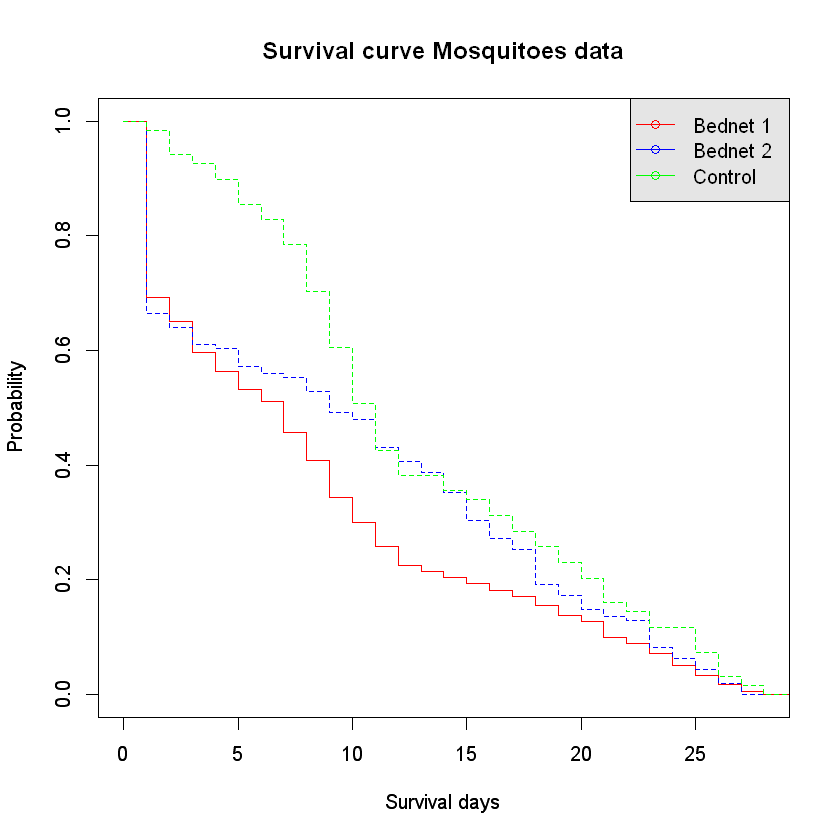

In [68]:
# We visualize the survival days of each group on the same graph
#png(file = "Survival curve Mosquitoes data.png")
plot(survfit(Surv(days, status) ~ group, data = BDN1, weight=occur), col="red", conf.int=F, main = "Survival curve Mosquitoes data", lty = 1:1,
     ylab = "Probability", xlab = "Survival days", xlim = c(0, 28))
par(new=T)
plot(survfit(Surv(days, status) ~ group, data = BDN2, weight=occur), col="blue", conf.int=F, lty = 2:1,
     ylab = "Probability", xlab = "Survival days", xlim = c(0, 28))
par(new=T)
plot(survfit(Surv(days, status) ~ group, data = Control, weight=occur), col="green", conf.int=F, lty = 2:1,
     ylab = "Probability", xlab = "Survival days", xlim = c(0, 28))
legend("topright", c("Bednet 1", "Bednet 2", "Control"), col = c('red', 'blue', 'green'),
       text.col = "black", lty = c(1, 1, 1), pch = c(1, 1, 1),
       merge = TRUE, bg = "gray90", trace=TRUE)
#dev.off()

After day 1, a mosquitoe has a survivability probability of 0.69 for BDN1 group, and 0.66 for BDN2 group. Moreover, a mosquitoe of Control group has a survivability probability of 0.98
Looking the Kaplan-Meyer Estimation of survival curve, we can say that after day 1 of exposition, exposed mosquitoes live less longer than non exposed mosquitoe. This can be confirmed looking the summary of Kaplan-Meyer estimates

In [69]:
# Create the surfit object
Estim =survfit(Surv(days, status) ~ group, data = n.data, weight=occur)
summary(Estim)

Call: survfit(formula = Surv(days, status) ~ group, data = n.data, 
    weights = occur)

                group=BDN1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    652     200  0.69325 0.01806      0.65874       0.7296
    2    452      28  0.65031 0.01868      0.61471       0.6880
    3    424      35  0.59663 0.01921      0.56013       0.6355
    4    389      21  0.56442 0.01942      0.52761       0.6038
    5    368      21  0.53221 0.01954      0.49525       0.5719
    6    347      14  0.51074 0.01958      0.47377       0.5506
    7    333      35  0.45706 0.01951      0.42037       0.4969
    8    298      32  0.40798 0.01925      0.37194       0.4475
    9    266      42  0.34356 0.01860      0.30897       0.3820
   10    224      28  0.30061 0.01796      0.26740       0.3380
   11    196      28  0.25767 0.01713      0.22619       0.2935
   12    168      21  0.22546 0.01637      0.19556       0.2599
   13    147       7  0.21472 0.01608      0.18541

### Mean/median death day in each group?

In [74]:
# Because we were able to follow all the mosquitoes during 30 days (No censored data), we can estimate a mean death day on this period 
print(Estim, print.rmean=TRUE) 

Call: survfit(formula = Surv(days, status) ~ group, data = n.data, 
    weights = occur)

              records   n events *rmean *se(rmean) median 0.95LCL 0.95UCL
group=BDN1         30 652    652   8.29      0.305      7       5       7
group=BDN2         30 577    577  10.10      0.358      9       8      11
group=Control      30 256    256  12.87      0.452     11      10      11
    * restricted mean with upper limit =  30 


### Is the difference of mean/median death day in groups statiscally significant ?

In [123]:
head(n.data,3)

days,status,occur,group
1,1,4,Control
2,1,11,Control
3,1,4,Control


We need to transform the dataset using values of the variable 'occur' for each day, and then remove it ('Occur'). It is a kind of de-summarize of the variable 'occur'. This is necessary to compute the test, otherwise we canot get true value of observed and expected events

In [161]:
# We write a Function to remove the 'occur' variable without loosing informations from the initial data set

rem_func = function(tab)
{
total=sum(sum(tab[,3])+sum(tab[,4])+sum(tab[,5]))
TimeData=matrix(data = NA, nrow = total+1, ncol = 3, byrow = TRUE,
       dimnames = NULL)
colnames(TimeData)= c('group','days','status')
Index=0
  for(i in tab[,2]) # We within days column
  {
	j=tab[i,3] # value of 'occur' at day i for Control group
    if(j!=0){
	TimeData[(Index+1):(Index+j),1] = 'Control' # We write the name of the group j times
	TimeData[(Index+1):(Index+j),2] = as.integer(i) # We re-write the day i j times, where j is the value of occur at day i for Control group
	TimeData[(Index+1):(Index+j),3] = as.integer(1) # We write the value 1, j times
      Index=Index+j}                                # We update the index
	else{Index=Index+j}

      k=tab[i,4]
     	if(k!=0){
	TimeData[(Index+1):(Index+k),1] = 'BDN1'
	TimeData[(Index+1):(Index+k),2] = as.integer(i)
	TimeData[(Index+1):(Index+k),3] = as.integer(1)
      Index=Index+k}
	else{Index=Index+k}

     	m=tab[i,5]
     	if(m!=0){
	TimeData[(Index+1):(Index+m),1] = 'BDN2'
	TimeData[(Index+1):(Index+m),2] = as.integer(i)
	TimeData[(Index+1):(Index+m),3] = as.integer(1)	
      Index=Index+m}
	else{Index=Index+m}
   }
  return (as.data.frame(TimeData))
}


In [162]:
test_data = rem_func(data)
head(test_data)
summary(test_data)

group,days,status
Control,1,1
Control,1,1
Control,1,1
Control,1,1
BDN1,1,1
BDN1,1,1


     group          days      status    
 BDN1   :652   1      :397   1   :1485  
 BDN2   :577   9      : 88   NA's:   1  
 Control:256   11     : 77              
 NA's   :  1   8      : 67              
               10     : 60              
               (Other):796              
               NA's   :  1              

In [163]:
# Perform the Tarone-Ware test
survdiff(Surv(as.integer(days), as.integer(status)) ~ group, data=test_data, rho=0.5)


Call:
survdiff(formula = Surv(as.integer(days), as.integer(status)) ~ 
    group, data = test_data, rho = 0.5)

n=1485, 1 observation deleted due to missingness.

                N Observed Expected (O-E)^2/E (O-E)^2/V
group=BDN1    652      453      470      0.64      1.82
group=BDN2    577      434      349     20.98     48.42
group=Control 256      152      220     21.13     42.64

 Chisq= 66.6  on 2 degrees of freedom, p= 3e-15 

### Compare the 02 groups of bednets

In [ ]:
bdn1_bdn2 = subset(test_data, group!= 'Control')

In [171]:
# Perform the Tarone-Ware test on groyps BDN1 Vs BDN2
survdiff(Surv(as.integer(days), as.integer(status)) ~ group, data=bdn1_bdn2, rho=0.5)

Call:
survdiff(formula = Surv(as.integer(days), as.integer(status)) ~ 
    group, data = bdn1_bdn2, rho = 0.5)

             N Observed Expected (O-E)^2/E (O-E)^2/V
group=BDN1 652      443      496      5.74      21.6
group=BDN2 577      425      372      7.65      21.6

 Chisq= 21.6  on 1 degrees of freedom, p= 3e-06 

The p.value of the test is less than 0.05. Then, we can reject the null hypothesis and say that there is enough evidence to claim there is a difference in survival between the 02 bednets groups.